# Plasticity Chart for Soil Classification

This notebook recreates the Casagrande Plasticity Chart used for classifying fine-grained soils according to the Unified Soil Classification System (USCS).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

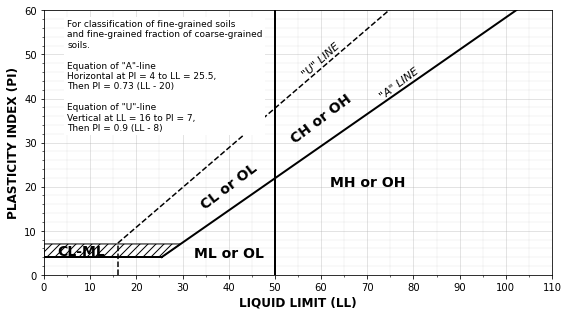

In [26]:
# Create the figure
fig, ax = plt.subplots(figsize=(8, 4.5))

# Set axis limits
ax.set_xlim(0, 110)
ax.set_ylim(0, 60)

# A-line: PI = 0.73(LL - 20) for LL > 25.5, horizontal at PI = 4 for LL <= 25.5
LL_A1 = np.array([0, 25.5])
PI_A1 = np.array([4, 4])
LL_A2 = np.linspace(25.5, 110, 100)
PI_A2 = 0.73 * (LL_A2 - 20)

# Plot A-line
ax.plot(LL_A1, PI_A1, 'k-', linewidth=2, label='A-line')
ax.plot(LL_A2, PI_A2, 'k-', linewidth=2)

# U-line: PI = 0.9(LL - 8) for LL > 16, vertical at LL = 16 for PI <= 7
LL_U1 = np.array([16, 16])
PI_U1 = np.array([0, 7])
LL_U2 = np.linspace(16, 110, 100)
PI_U2 = 0.9 * (LL_U2 - 8)

# Plot U-line
ax.plot(LL_U1, PI_U1, 'k--', linewidth=1.5, label='U-line')
ax.plot(LL_U2, PI_U2, 'k--', linewidth=1.5)

# Vertical line at LL = 50
ax.axvline(x=50, color='k', linewidth=2)

# Add hatched region for CL-ML
LL_hatch= (7/0.73) + 20  # LL where A-line intersects PI=7
cl_ml_vertices = [(0, 4), (25.5, 4), (LL_hatch, 7), (16, 7), (16, 7), (0, 7)]
cl_ml_patch = Polygon(cl_ml_vertices, closed=True, edgecolor='k', 
                      facecolor='none', hatch='///', linewidth=1)
ax.add_patch(cl_ml_patch)

# Add classification labels
ax.text(40, 4, 'ML or OL', fontsize=14, ha='center', weight='bold')
ax.text(8, 4.5, 'CL-ML', fontsize=14, ha='center', weight='bold')
ax.text(40, 15, 'CL or OL', fontsize=14, ha='center', weight='bold', rotation=37)
ax.text(60, 30, 'CH or OH', fontsize=14, ha='center', weight='bold', rotation=37)
ax.text(70, 20, 'MH or OH', fontsize=14, ha='center', weight='bold')
ax.text(60, 45, r'"U" LINE', fontsize=11, ha='center', rotation=42, style='italic')
ax.text(77, 40, r'"A" LINE', fontsize=11, ha='center', rotation=37, style='italic')

# Add annotation text
annotation_text = (
    'For classification of fine-grained soils\n'
    'and fine-grained fraction of coarse-grained\n'
    'soils.\n\n'
    'Equation of "A"-line\n'
    'Horizontal at PI = 4 to LL = 25.5,\n'
    'Then PI = 0.73 (LL - 20)\n\n'
    'Equation of "U"-line\n'
    'Vertical at LL = 16 to PI = 7,\n'
    'Then PI = 0.9 (LL - 8)'
)
ax.text(5, 58, annotation_text, fontsize=9, va='top', 
        bbox=dict(boxstyle='square', facecolor='white', edgecolor='none'))

# Grid
ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

# Major ticks
ax.set_xticks(np.arange(0, 111, 10))
ax.set_yticks(np.arange(0, 61, 10))

# Minor ticks for finer grid
ax.set_xticks(np.arange(0, 111, 5), minor=True)
ax.set_yticks(np.arange(0, 61, 2), minor=True)
ax.grid(True, which='minor', linestyle='-', linewidth=0.3, alpha=0.5)

# Labels
ax.set_xlabel('LIQUID LIMIT (LL)', fontsize=12, weight='bold')
ax.set_ylabel('PLASTICITY INDEX (PI)', fontsize=12, weight='bold')

# Remove legend (since we have labels on the plot)
# ax.legend()

plt.tight_layout()
# Save as svg
plt.savefig('soil_consistency_classification_chart.svg')
plt.show()

## Soil Classification Legend

- **CL**: Lean clay (low plasticity)
- **CH**: Fat clay (high plasticity)
- **ML**: Silt (low plasticity)
- **MH**: Elastic silt (high plasticity)
- **OL**: Organic clay/silt (low plasticity)
- **OH**: Organic clay/silt (high plasticity)
- **CL-ML**: Clay-silt boundary classification

The chart divides soils based on:
- **Liquid Limit (LL)**: LL < 50 (low) vs LL ≥ 50 (high)
- **Position relative to A-line**: Above = clay, Below = silt
- **U-line**: Upper boundary for natural soils